<a href="https://colab.research.google.com/github/EduardoAve/Data-science-portfolio/blob/main/boston-crime-eda/EDA_Boston_crimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# -----------------------------------------------------------------------------
# Exploratory Data Analysis (EDA) of Boston Crime Incident Reports
# -----------------------------------------------------------------------------
# Dataset Source: Boston Police Department (BPD) via Kaggle
# Time Period: June 14, 2015 - September 3, 2018
#
# This script performs initial data loading, cleaning, merging, inspection,
# and univariate analysis of the Boston crime dataset.
# -----------------------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # For handling NaN if necessary


In [5]:

# --- 1. Data Loading ---
print("--- 1. Loading Data ---")
# Define file paths (adjust if necessary)
crime_file_path = '/content/crime.csv'
offense_codes_file_path = '/content/offense_codes.csv'

try:
    # Attempt to read the main crime data file using latin-1 encoding
    # This encoding was found necessary due to 'UnicodeDecodeError' with default utf-8
    df1 = pd.read_csv(crime_file_path, encoding='latin-1')
    print(f"Successfully read '{crime_file_path}' using latin-1 encoding.")

except UnicodeDecodeError:
    print(f"Error: latin-1 encoding also failed for '{crime_file_path}'. Try other encodings like 'cp1252'.")
    df1 = pd.DataFrame() # Create empty DataFrame on error
except FileNotFoundError:
    print(f"Error: File not found at '{crime_file_path}'. Please check the path.")
    df1 = pd.DataFrame() # Create empty DataFrame on error
except Exception as e:
    print(f"An unexpected error occurred while reading '{crime_file_path}': {e}")
    df1 = pd.DataFrame() # Create empty DataFrame on error

try:
    # Attempt to read the offense codes file, also using latin-1
    df2 = pd.read_csv(offense_codes_file_path, encoding='latin-1')
    print(f"Successfully read '{offense_codes_file_path}' using latin-1 encoding.")
except FileNotFoundError:
    print(f"Error: File not found at '{offense_codes_file_path}'. Please check the path.")
    df2 = pd.DataFrame() # Create empty DataFrame on error
except Exception as e:
    print(f"An unexpected error occurred while reading '{offense_codes_file_path}': {e}")
    df2 = pd.DataFrame() # Create empty DataFrame on error


--- 1. Loading Data ---
Successfully read '/content/crime.csv' using latin-1 encoding.
Successfully read '/content/offense_codes.csv' using latin-1 encoding.


In [6]:

# --- 2. Prepare Offense Codes DataFrame ---
print("\n--- 2. Preparing Offense Codes DataFrame ---")
# Rename columns in df2 for clarity before merging
# Rename 'CODE' to 'OFFENSE_CODE' to match df1
# Rename 'NAME' to 'OFFENSE_NAME' to avoid confusion with 'OFFENSE_DESCRIPTION' in df1
if not df2.empty:
    try:
        # Check if columns need renaming
        if 'CODE' in df2.columns and 'NAME' in df2.columns:
             df2 = df2.rename(columns={'CODE': 'OFFENSE_CODE', 'NAME': 'OFFENSE_NAME'})
             print("Renamed df2 columns: 'CODE' -> 'OFFENSE_CODE', 'NAME' -> 'OFFENSE_NAME'.")
        elif 'OFFENSE_CODE' in df2.columns and 'OFFENSE_NAME' in df2.columns:
             print("df2 columns already seem to have the correct names ('OFFENSE_CODE', 'OFFENSE_NAME').")
        else:
             # This case indicates unexpected column names in df2
             print("Warning: Expected columns ('CODE', 'NAME' or 'OFFENSE_CODE', 'OFFENSE_NAME') not found in df2.")
    except Exception as e:
        print(f"Error occurred while trying to rename df2 columns: {e}")
else:
    print("df2 is empty, skipping renaming and merging.")



--- 2. Preparing Offense Codes DataFrame ---
Renamed df2 columns: 'CODE' -> 'OFFENSE_CODE', 'NAME' -> 'OFFENSE_NAME'.


In [7]:

# --- 3. Merge DataFrames ---
print("\n--- 3. Merging DataFrames ---")
df_merged = pd.DataFrame() # Initialize empty DataFrame

if not df1.empty and not df2.empty:
    # Ensure the merge key 'OFFENSE_CODE' exists in both DataFrames
    if 'OFFENSE_CODE' in df1.columns and 'OFFENSE_CODE' in df2.columns:
        try:
            # Perform a left merge to keep all crime incidents and add offense names
            df_merged = pd.merge(df1, df2, on='OFFENSE_CODE', how='left')
            print(f"DataFrames merged successfully. New shape: {df_merged.shape}")
            # Check if the merge added the 'OFFENSE_NAME' column as expected
            if 'OFFENSE_NAME' not in df_merged.columns:
                 print("Warning: 'OFFENSE_NAME' column not found after merge. Check df2 content.")
        except Exception as e:
            print(f"Error during DataFrame merge: {e}")
            # If merge fails, fall back to using only df1 for subsequent steps
            df_merged = df1.copy()
            print("Proceeding with data from the primary crime file (df1) only.")
    else:
        print("Merge key 'OFFENSE_CODE' not found in both DataFrames. Proceeding with df1 only.")
        df_merged = df1.copy()
elif not df1.empty:
    print("Offense codes data (df2) is empty or failed to load. Proceeding with df1 only.")
    df_merged = df1.copy()
else:
    print("Primary crime data (df1) is empty. Cannot proceed with analysis.")



--- 3. Merging DataFrames ---
DataFrames merged successfully. New shape: (577880, 18)


In [8]:

# --- 4. Initial Data Inspection ---
if not df_merged.empty:
    print("\n--- 4. Initial Data Inspection ---")
    print("\n[DataFrame Information]")
    df_merged.info()

    print("\n[First 5 Rows]")
    print(df_merged.head())

    print("\n[Descriptive Statistics (Numerical Columns)]")
    # Include useful percentiles for distribution insights
    print(df_merged.describe(percentiles=[.25, .5, .75, .9, .95, .99]))

    print("\n[Descriptive Statistics (Categorical/Object Columns)]")
    print(df_merged.describe(include='object'))

    print("\n[Null Value Counts per Column]")
    print(df_merged.isnull().sum())

    print("\n[Null Value Percentage per Column]")
    print((df_merged.isnull().sum() / len(df_merged)) * 100)

    # Check for duplicates based on incident number
    # Note: Multiple rows per incident number might be valid if multiple offenses occurred.
    if 'INCIDENT_NUMBER' in df_merged.columns:
        print(f"\nNumber of rows with duplicated INCIDENT_NUMBER: {df_merged['INCIDENT_NUMBER'].duplicated().sum()}")
        print(f"Number of unique INCIDENT_NUMBER values: {df_merged['INCIDENT_NUMBER'].nunique()}")
    else:
        print("\n'INCIDENT_NUMBER' column not found.")



--- 4. Initial Data Inspection ---

[DataFrame Information]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577880 entries, 0 to 577879
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      577880 non-null  object 
 1   OFFENSE_CODE         577880 non-null  int64  
 2   OFFENSE_CODE_GROUP   577880 non-null  object 
 3   OFFENSE_DESCRIPTION  577880 non-null  object 
 4   DISTRICT             574956 non-null  object 
 5   REPORTING_AREA       577880 non-null  object 
 6   SHOOTING             1979 non-null    object 
 7   OCCURRED_ON_DATE     577880 non-null  object 
 8   YEAR                 577880 non-null  int64  
 9   MONTH                577880 non-null  int64  
 10  DAY_OF_WEEK          577880 non-null  object 
 11  HOUR                 577880 non-null  int64  
 12  UCR_PART             577786 non-null  object 
 13  STREET               560320 non-null  object 
 14  Lat    

In [9]:

# --- 5. Basic Cleaning and Preprocessing ---
if not df_merged.empty:
    print("\n--- 5. Basic Cleaning and Preprocessing ---")

    # Convert 'OCCURRED_ON_DATE' to datetime objects
    if 'OCCURRED_ON_DATE' in df_merged.columns:
        try:
            df_merged['OCCURRED_ON_DATE'] = pd.to_datetime(df_merged['OCCURRED_ON_DATE'])
            print("'OCCURRED_ON_DATE' column successfully converted to datetime.")

            # Optional: Verify consistency with existing date/time columns
            # print("\nVerifying date/time consistency (optional check)...")
            # year_check = pd.to_datetime(df_merged['OCCURRED_ON_DATE']).dt.year.equals(df_merged['YEAR'])
            # month_check = pd.to_datetime(df_merged['OCCURRED_ON_DATE']).dt.month.equals(df_merged['MONTH'])
            # hour_check = pd.to_datetime(df_merged['OCCURRED_ON_DATE']).dt.hour.equals(df_merged['HOUR'])
            # print(f"  Year consistent: {year_check}")
            # print(f"  Month consistent: {month_check}")
            # print(f"  Hour consistent: {hour_check}")
            # Note: Day of week check requires careful mapping between integer and string representation.

        except Exception as e:
            print(f"Error converting 'OCCURRED_ON_DATE' to datetime: {e}")
    else:
        print("'OCCURRED_ON_DATE' column not found for conversion.")

    # Handle 'SHOOTING' column
    # This column has very few non-null values (~1019).
    # Assumption: NaN means 'No' (N), existing values (likely 'Y') mean 'Yes'.
    if 'SHOOTING' in df_merged.columns:
        print(f"\nUnique values in 'SHOOTING' before cleaning: {df_merged['SHOOTING'].unique()}")
        # Fill NaN values with 'N'
        df_merged['SHOOTING'] = df_merged['SHOOTING'].fillna('N')
        # Standardize any other potential representations if necessary (e.g., '1'/'0')
        # df_merged['SHOOTING'] = df_merged['SHOOTING'].replace({'1': 'Y', '0': 'N'})
        print(f"Unique values in 'SHOOTING' after cleaning: {df_merged['SHOOTING'].unique()}")
        print("NaN values in 'SHOOTING' column replaced with 'N'.")
    else:
        print("\n'SHOOTING' column not found.")

    # Note on handling other missing values (Strategy Reminder)
    print("\nReminder: Strategy for other missing values:")
    print("- DISTRICT (~0.55% null): Consider imputing with 'Unknown' or the mode.")
    print("- UCR_PART (~0.03% null): Consider imputing with 'Unknown' or the mode.")
    print("- STREET (~3.4% null): Consider imputing with 'Unknown'.")
    print("- Lat/Long (~6.27% null): Imputation is complex. Options: drop rows for geospatial analysis or mark location as 'Unknown'.")
    # No imputation applied in this initial script.



--- 5. Basic Cleaning and Preprocessing ---
'OCCURRED_ON_DATE' column successfully converted to datetime.

Unique values in 'SHOOTING' before cleaning: [nan 'Y']
Unique values in 'SHOOTING' after cleaning: ['N' 'Y']
NaN values in 'SHOOTING' column replaced with 'N'.

Reminder: Strategy for other missing values:
- DISTRICT (~0.55% null): Consider imputing with 'Unknown' or the mode.
- UCR_PART (~0.03% null): Consider imputing with 'Unknown' or the mode.
- STREET (~3.4% null): Consider imputing with 'Unknown'.
- Lat/Long (~6.27% null): Imputation is complex. Options: drop rows for geospatial analysis or mark location as 'Unknown'.



--- 6. Univariate Analysis - Visualizations ---


<ipython-input-10-65d61c299bc8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='OFFENSE_CODE_GROUP',


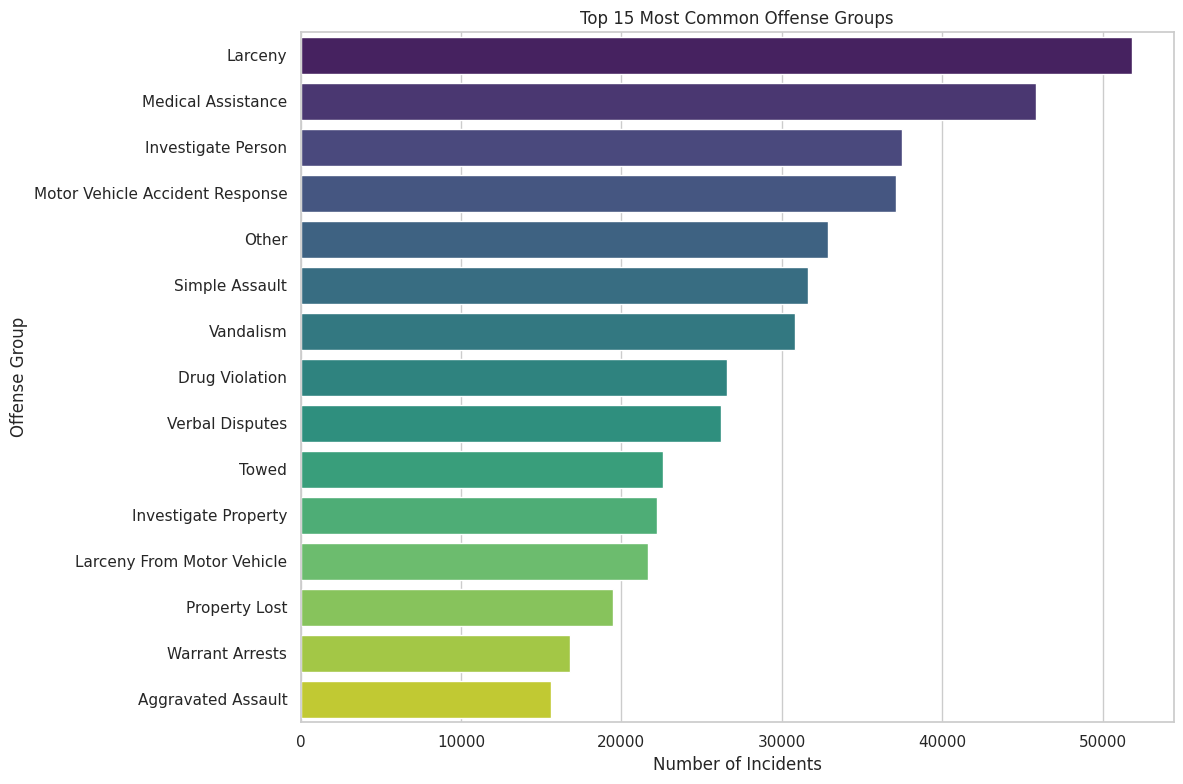

<ipython-input-10-65d61c299bc8>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DISTRICT', data=df_merged, order=district_order, palette='magma')


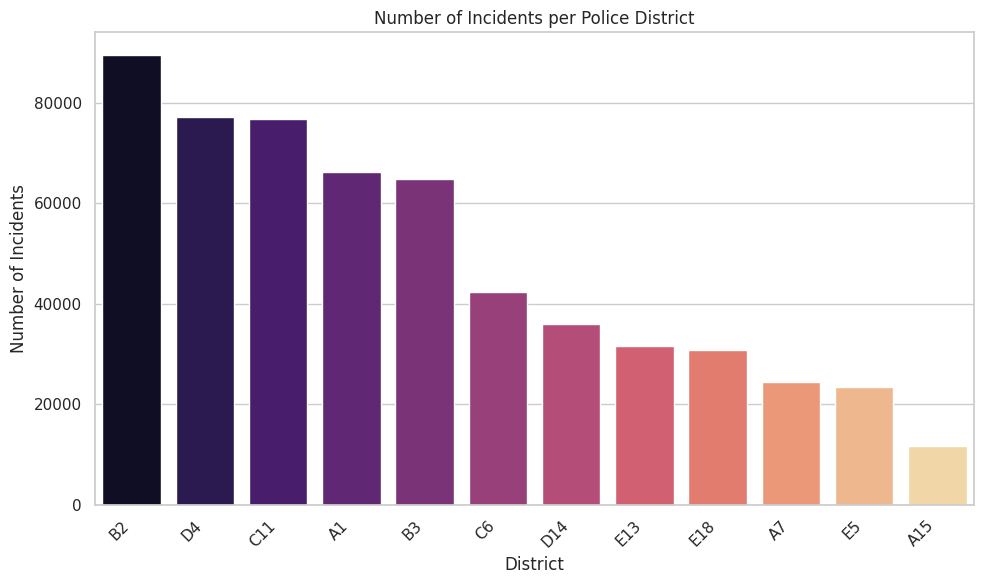

<ipython-input-10-65d61c299bc8>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='YEAR', data=df_merged, palette='coolwarm')


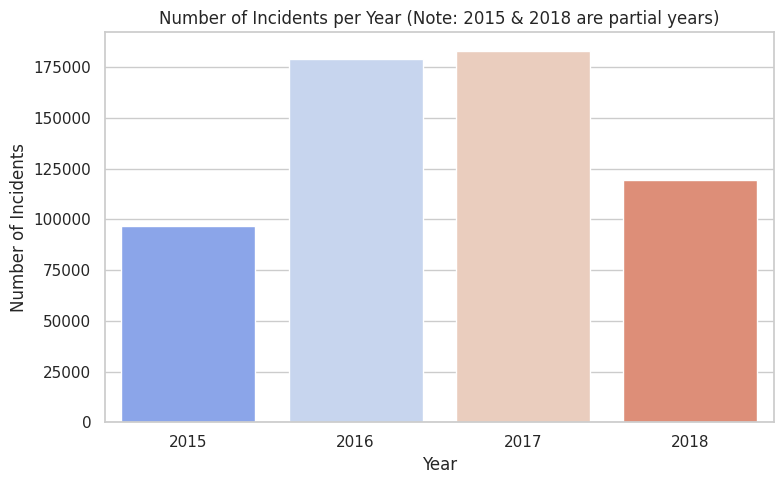

<ipython-input-10-65d61c299bc8>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MONTH', data=df_merged, palette='cubehelix')


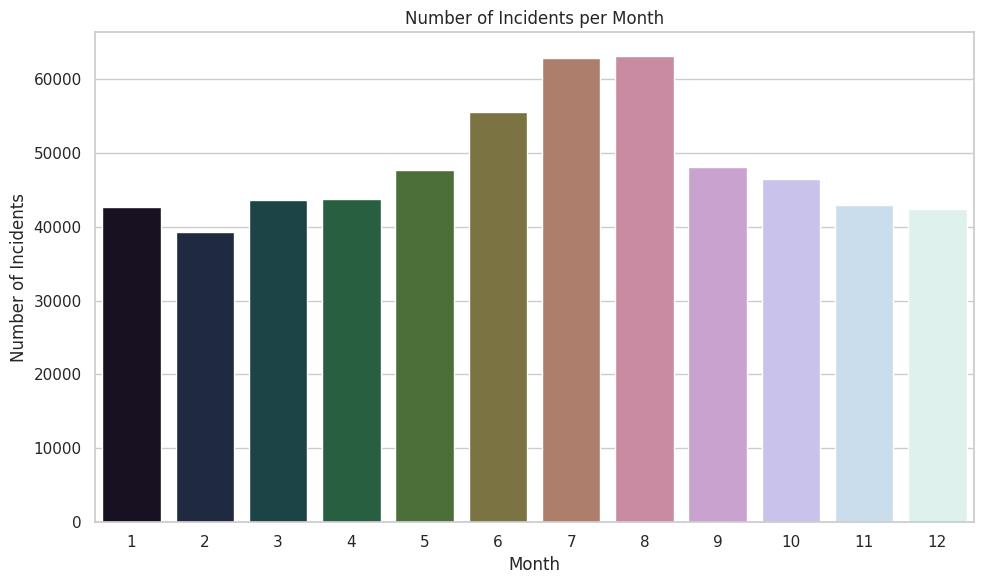

<ipython-input-10-65d61c299bc8>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DAY_OF_WEEK', data=df_merged, order=day_order, palette='Spectral')


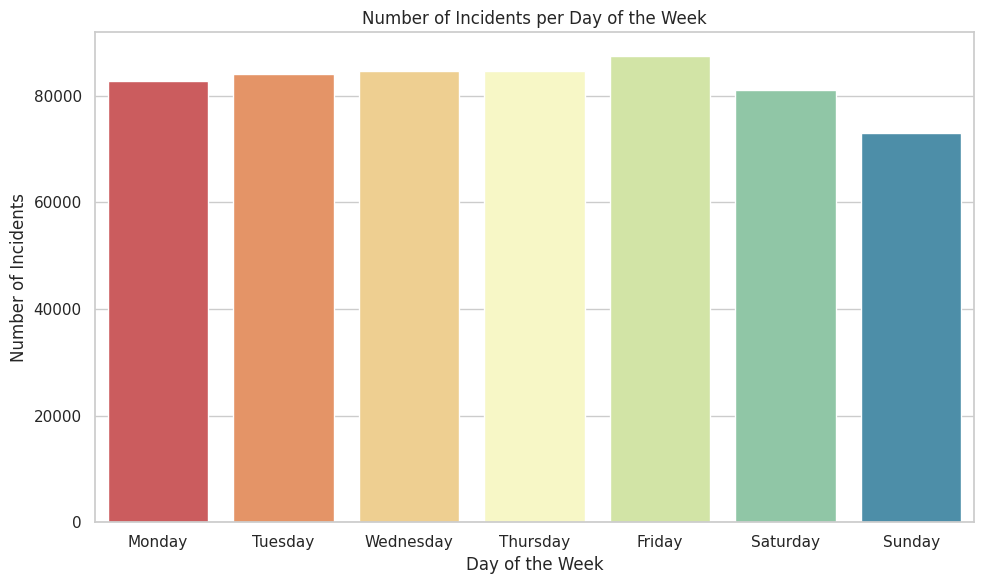

<ipython-input-10-65d61c299bc8>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HOUR', data=df_merged, palette='rocket')


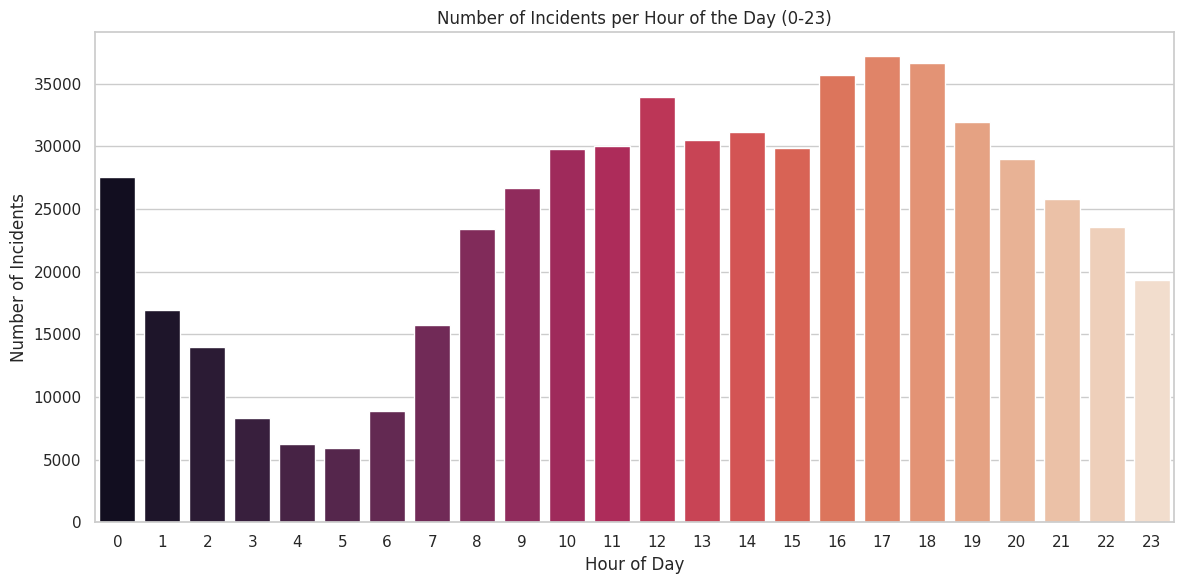

<ipython-input-10-65d61c299bc8>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='SHOOTING', data=df_merged, palette=['skyblue', 'salmon'], order=['N', 'Y']) # Ensure order


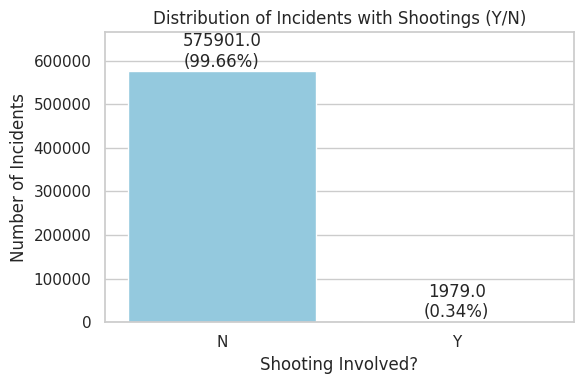


--- End of Initial Exploratory Data Analysis ---


In [10]:

# --- 6. Univariate Analysis - Visualizations ---
if not df_merged.empty:
    print("\n--- 6. Univariate Analysis - Visualizations ---")

    # Set plot style for better aesthetics
    sns.set(style="whitegrid")
    plot_palette = "viridis" # Define a palette for consistency

    # 6.1. Top N Offense Groups (OFFENSE_CODE_GROUP)
    if 'OFFENSE_CODE_GROUP' in df_merged.columns:
        plt.figure(figsize=(12, 8))
        n_top_offenses = 15
        # Calculate value counts and get the index of the top N
        top_offenses = df_merged['OFFENSE_CODE_GROUP'].value_counts().nlargest(n_top_offenses).index
        # Filter data to include only top N for plotting
        sns.countplot(y='OFFENSE_CODE_GROUP',
                      data=df_merged[df_merged['OFFENSE_CODE_GROUP'].isin(top_offenses)],
                      order=top_offenses,
                      palette=plot_palette)
        plt.title(f'Top {n_top_offenses} Most Common Offense Groups')
        plt.xlabel('Number of Incidents')
        plt.ylabel('Offense Group')
        plt.tight_layout() # Adjust layout to prevent overlapping labels
        plt.show()
    else:
        print("Skipping 'Offense Group' plot: Column not found.")

    # 6.2. Incidents per Police District (DISTRICT)
    if 'DISTRICT' in df_merged.columns:
        plt.figure(figsize=(10, 6))
        # Order districts by frequency
        district_order = df_merged['DISTRICT'].value_counts().index
        sns.countplot(x='DISTRICT', data=df_merged, order=district_order, palette='magma')
        plt.title('Number of Incidents per Police District')
        plt.xlabel('District')
        plt.ylabel('Number of Incidents')
        plt.xticks(rotation=45, ha='right') # Rotate labels if needed
        plt.tight_layout()
        plt.show()
    else:
        print("Skipping 'District' plot: Column not found.")

    # 6.3. Incidents per Year (YEAR)
    if 'YEAR' in df_merged.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x='YEAR', data=df_merged, palette='coolwarm')
        plt.title('Number of Incidents per Year (Note: 2015 & 2018 are partial years)')
        plt.xlabel('Year')
        plt.ylabel('Number of Incidents')
        plt.tight_layout()
        plt.show()
    else:
        print("Skipping 'Year' plot: Column not found.")

    # 6.4. Incidents per Month (MONTH)
    if 'MONTH' in df_merged.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x='MONTH', data=df_merged, palette='cubehelix')
        plt.title('Number of Incidents per Month')
        plt.xlabel('Month')
        plt.ylabel('Number of Incidents')
        # Optional: Map month numbers to names for clarity
        # plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        plt.tight_layout()
        plt.show()
    else:
        print("Skipping 'Month' plot: Column not found.")

    # 6.5. Incidents per Day of the Week (DAY_OF_WEEK)
    if 'DAY_OF_WEEK' in df_merged.columns:
        plt.figure(figsize=(10, 6))
        # Define the correct order for days of the week
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        sns.countplot(x='DAY_OF_WEEK', data=df_merged, order=day_order, palette='Spectral')
        plt.title('Number of Incidents per Day of the Week')
        plt.xlabel('Day of the Week')
        plt.ylabel('Number of Incidents')
        plt.tight_layout()
        plt.show()
    else:
        print("Skipping 'Day of Week' plot: Column not found.")

    # 6.6. Incidents per Hour of the Day (HOUR)
    if 'HOUR' in df_merged.columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(x='HOUR', data=df_merged, palette='rocket')
        plt.title('Number of Incidents per Hour of the Day (0-23)')
        plt.xlabel('Hour of Day')
        plt.ylabel('Number of Incidents')
        plt.tight_layout()
        plt.show()
    else:
        print("Skipping 'Hour' plot: Column not found.")

    # 6.7. Distribution of Incidents Involving Shootings (SHOOTING)
    if 'SHOOTING' in df_merged.columns:
        plt.figure(figsize=(6, 4))
        ax = sns.countplot(x='SHOOTING', data=df_merged, palette=['skyblue', 'salmon'], order=['N', 'Y']) # Ensure order
        plt.title('Distribution of Incidents with Shootings (Y/N)')
        plt.xlabel('Shooting Involved?')
        plt.ylabel('Number of Incidents')

        # Add count and percentage annotations to the bars
        total = len(df_merged)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2., # x position
                    height + 3, # y position (slightly above bar)
                    f'{height}\n({height/total:.2%})', # Text: count and percentage
                    ha="center", va='bottom') # Alignment

        # Adjust y-axis limit to make space for annotations
        plt.ylim(0, ax.get_ylim()[1] * 1.1)
        plt.tight_layout()
        plt.show()
    else:
        print("Skipping 'Shooting' plot: Column not found.")

else:
    print("\nDataFrame is empty. No analysis or visualizations can be performed.")

print("\n--- End of Initial Exploratory Data Analysis ---")
# -----------------------------------------------------------------------------
# Next Steps / Further Analysis Ideas:
# - Bivariate analysis (e.g., Offense Type vs. Hour/Day/District)
# - Time series analysis (trends, seasonality)
# - Geospatial analysis (mapping incidents using Lat/Long)
# - Handle remaining missing values (imputation or removal)
# - Feature engineering (e.g., extracting time periods like 'morning', 'night')
# -----------------------------------------------------------------------------
